# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.
- 시각적으로 좋다. matplotlib 보다 dataframe과 연동 사용이 편하다.
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
!pip install seaborn

In [3]:
# 데이터 시각화 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings(action = 'ignore') # 실행 시 뜨는 경고메시지는 무시해라.

In [4]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# seaborn에서 제공하는 toy dataset을 DataFrame으로 가져오는 함수. (tips : 팁 데이터셋)
# toy dataset : 패키지에 사용할 수 있는 연습용 공개 데이터. (기업이 제공한 더미 아닌 실제 데이터 )

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프
- rugplot
- kdeplot - histogram을 부드러운 곡선형태로
- distplot - histogram

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [7]:
tips['total_bill'] # 연속형

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

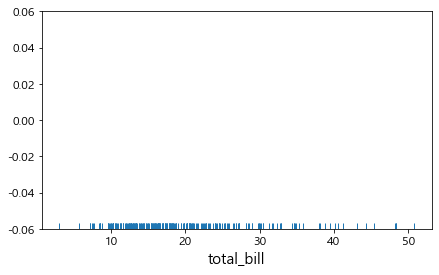

In [11]:
# y축 의미없음.
# x축에 값이 있는 위치에 표시. 수량을 보고 하는 게 아니라 값들의 위치를 찍은 것이다.

# 그닥 유용하진 않아서 사실 이것만 쓰지는 않음. 히스토그램이랑 같이 쓴다.
# 히스토그램은 세부적으로 값의 수량은 모른다. 구간 내 수량만 아는거지. 그래서 rug와 같이 쓰면 이를 알 수 있다.
# histogram과 같이 시각화해서 각 계급(bin, group별 범위)안에서의 값의 분포를 확인할 수 있다.

# plt와 같이 사용을 한다. 설정은 plt로.


# 1
# xlabel 자동으로 나옴.
plt.figure(figsize=(7,4))
sns.rugplot(tips['total_bill'])

plt.show()

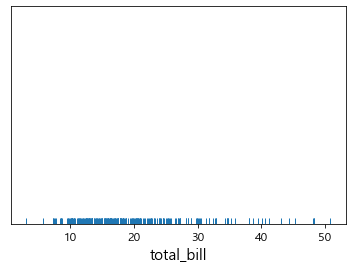

In [14]:
# 2
# seaborn은 dataframe 과 연동이 matplotlib보다 쉽다.
# 그래프를 그릴 때 사용할 값에다 컬럼명을 지정, data = DataFrame을 지정.
# 이렇게 많이 씀.

sns.rugplot('total_bill', data = tips)
#plt.yticks([0.1, 0.2], labels = ['a', 'b'])
plt.yticks([]) # 눈금 없애기.
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

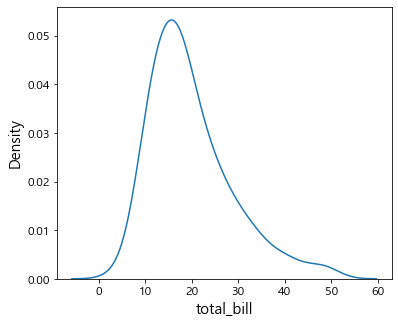

In [69]:
plt.figure(figsize = (6,5) )
sns.kdeplot(tips['total_bill'])
# sns.kdeplot('total_bill', data=tips)
plt.show()

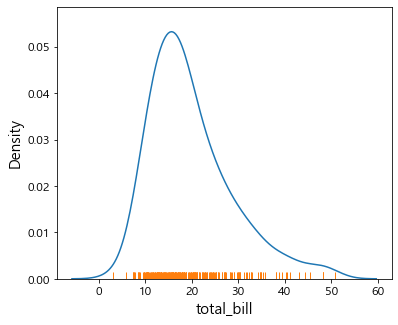

In [18]:
plt.figure(figsize = (6,5) )
sns.kdeplot(tips['total_bill']) # y축 : 수량의 비율
sns.rugplot(tips['total_bill'])
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - hist, kdeplot은 default로 나오고 rugplot은 default로 안나온다.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

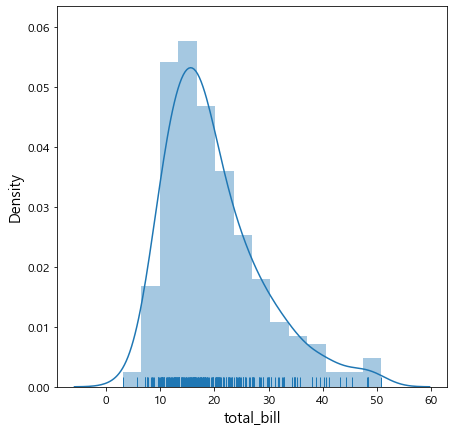

In [21]:
plt.figure(figsize = (7,7))
sns.distplot(tips['total_bill'],# 컬럼명, data=DF 형식으로 호출할 수 없다.
            hist = True, # 히스토그램을 그릴지 여부(def = T)
            kde = True, # ked 을 그릴지 여부(def = T)
            rug = True, # rugplot 을 그릴지 여부(def = F)
            bins = 30 # histogrom의 bins의 개수
            )  

In [23]:
tips.loc[tips['sex'] == 'Male', 'total_bill'] # 남성의 total bill
tips.loc[tips['sex'] == 'Female', 'total_bill'] # 여성의 total bill

1      10.34
2      21.01
3      23.68
5      25.29
6       8.77
       ...  
236    12.60
237    32.83
239    29.03
241    22.67
242    17.82
Name: total_bill, Length: 157, dtype: float64

### displot()
- displot() : group 별로 나눠서 시각화
    - 기본값 : hist = T, kde = F, rug = F
    -  hue = '범주형 컬럼' : 그룹으로 나누고 싶을 때 해당 매개변수를 넣으면 됨. 다른 그래프에서도 적용가능.?~?
    - 매개변수 순서때문에 키워드 인자로 넣어주기.
- distplot() : 하나의 컬럼에 대해서만 시각화

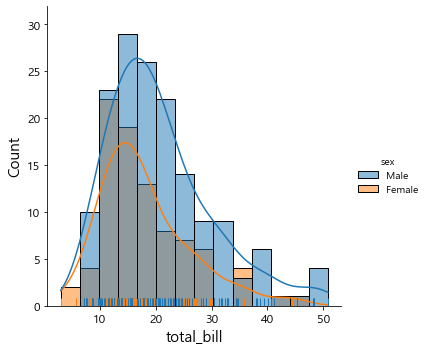

In [27]:
# group 별로 나눠서  히스토그램, rugplot, kdeplot 등을 확인
# 다른 plot에도 적용

# 남성/여자 별 total_bill 분포를 비교

# 겹치는 애들은 검은색.
 
sns.displot(x ='total_bill', hue = 'sex' , data=tips, kde = True, rug = True)

plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

Text(0.5, 1.0, '수평방향의 boxplot')

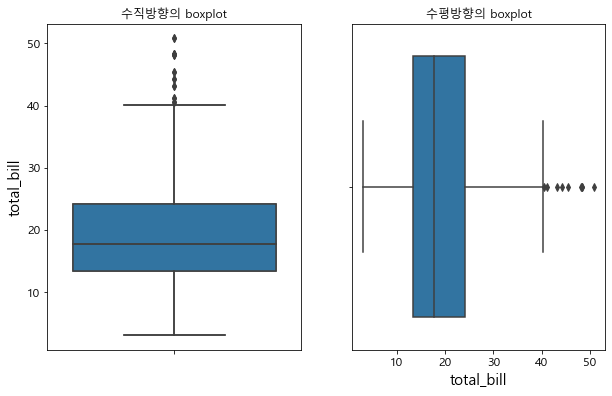

In [32]:
plt.figure(figsize=(10,6))

# 하나의 figure에 2개의 axes를 이용해 시각화.
plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill'])
# sns.boxplot(y='total_bill', data=tips) #dataframe과 컬럼명을 분리해 설정

plt.title('수직방향의 boxplot')


plt.subplot(1,2,2)
sns.boxplot(x=tips['total_bill'])
plt.title('수평방향의 boxplot')

<AxesSubplot:xlabel='smoker', ylabel='tip'>

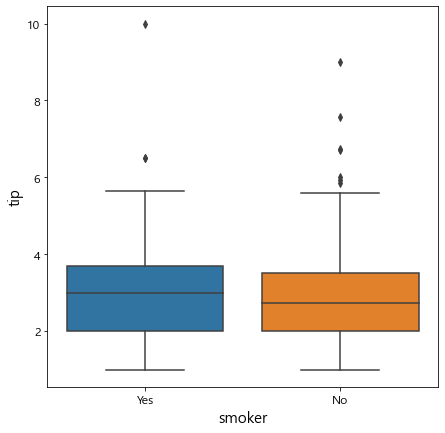

In [34]:
# 흡연여부별 tip의 분포를 boxplot 비교
# 비교 : 한 axes에 시각화

plt.figure(figsize = (7,7))
# 수직
sns.boxplot(y = 'tip', x= 'smoker', data = tips)


<AxesSubplot:xlabel='smoker', ylabel='tip'>

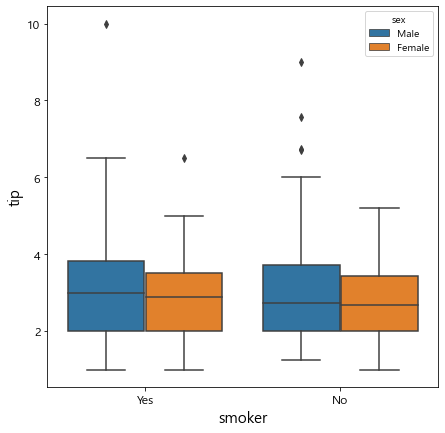

In [35]:
# 흡연 + 성별 tip 분포를 boxplot
# 두개의 그룹화
# smoker 중 또 성별로 나눔.

plt.figure(figsize=(7,7))
sns.boxplot(y='tip', x='smoker', hue='sex', data=tips)

<AxesSubplot:xlabel='tip', ylabel='smoker'>

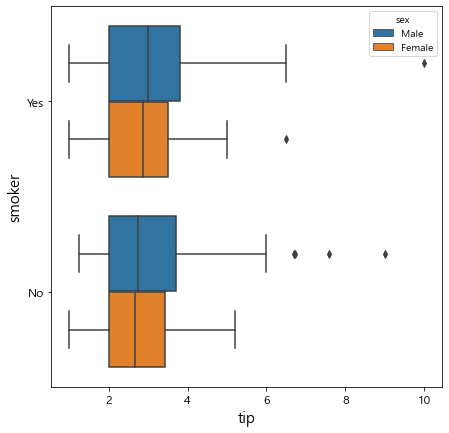

In [36]:
plt.figure(figsize=(7,7))
sns.boxplot(x='tip', y='smoker', hue='sex', data=tips)

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

<AxesSubplot:ylabel='total_bill'>

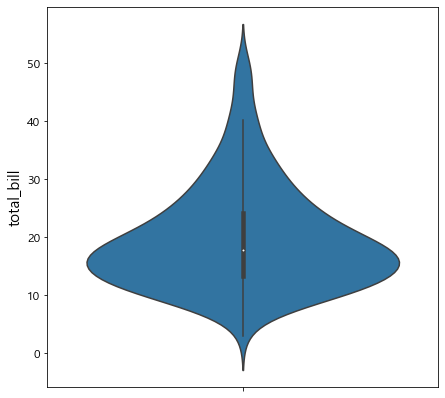

In [37]:
plt.figure(figsize=(7,7))

# 수직
sns.violinplot(y='total_bill', data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

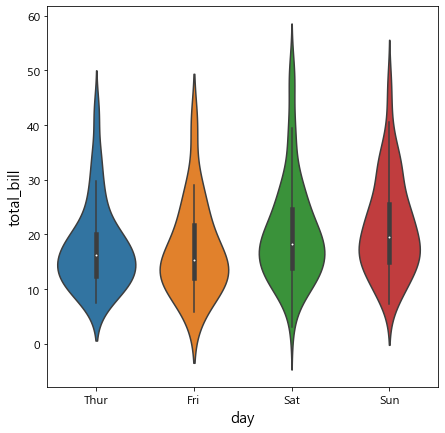

In [38]:
# 요일(data) 별 분포
plt.figure(figsize=(7,7))
sns.violinplot(y='total_bill', x = 'day', data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

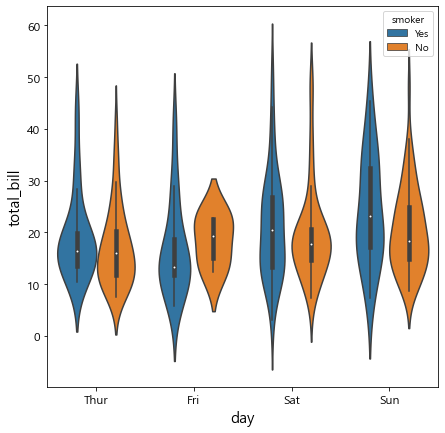

In [39]:
# 요일, 흡연 별 분포
plt.figure(figsize=(7,7))
sns.violinplot(y='total_bill', x = 'day', hue='smoker', data = tips)

# x,y 바꾸면 수평

### swarmplot
- 실제 값들을 점으로 찍어 준다. 데이터 값만큼 점
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다. 같이 쓴다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

<AxesSubplot:ylabel='total_bill'>

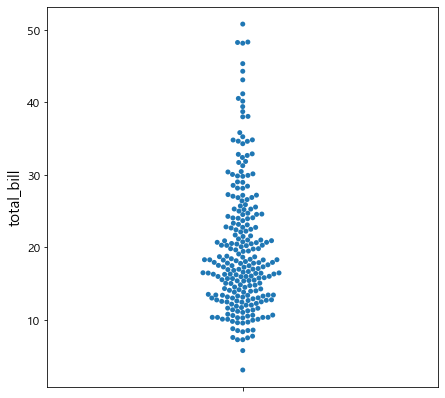

In [40]:
plt.figure(figsize = (7,7))
sns.swarmplot(y='total_bill', data = tips )

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

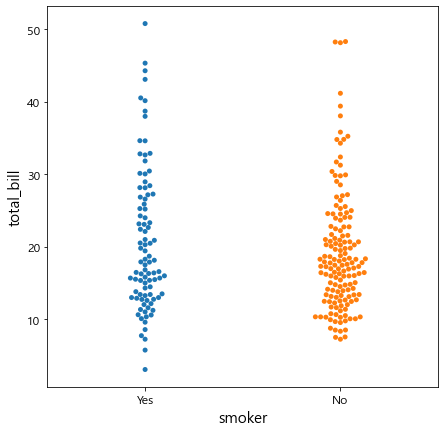

In [42]:
plt.figure(figsize = (7,7))
sns.swarmplot(y='total_bill', x='smoker', data = tips )

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

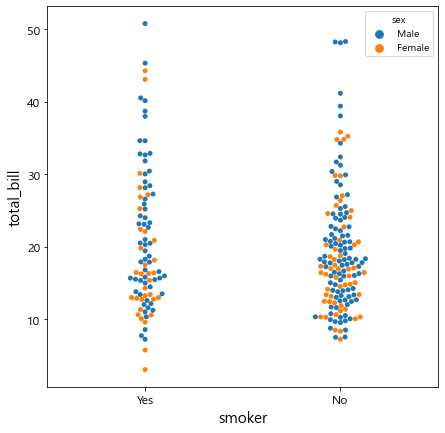

In [43]:
plt.figure(figsize = (7,7))
sns.swarmplot(y='total_bill', x='smoker', hue = 'sex', data = tips )

<AxesSubplot:ylabel='total_bill'>

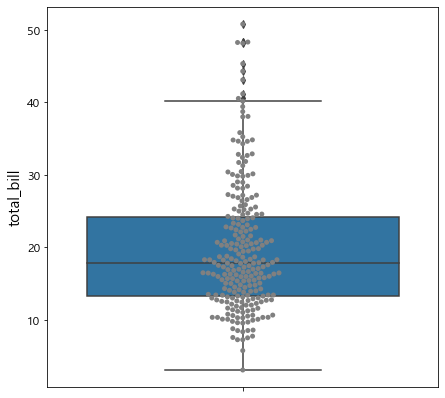

In [47]:
# boxplot에 함께 써서 값의 분포를 확인하게
plt.figure(figsize=(7,7))
sns.boxplot(y='total_bill', data=tips)
sns.swarmplot(y='total_bill', data=tips, color = 'gray') # 색 다르게 주기.

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

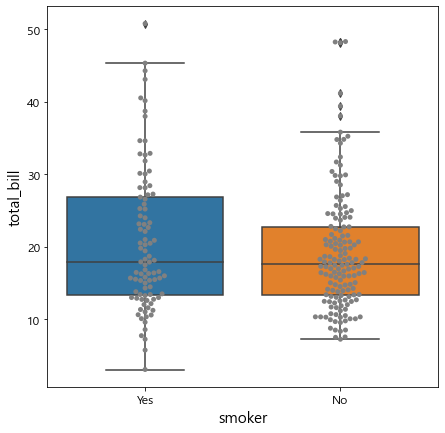

In [49]:
plt.figure(figsize=(7,7))
sns.boxplot(y='total_bill', x = 'smoker' , data=tips)
sns.swarmplot(y='total_bill', x= 'smoker', data=tips, color = 'gray')

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

<BarContainer object of 2 artists>

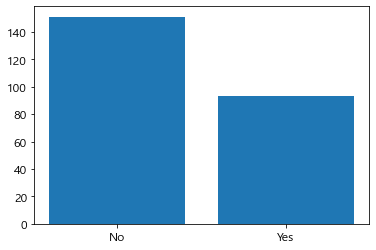

In [50]:
# matplotlib
# 개수를 세는 작업을 한 뒤에 그 결과로 시각화
vc=tips['smoker'].value_counts() # 이걸 대샌 해준다.
plt.bar(vc.index, vc)

<AxesSubplot:xlabel='smoker', ylabel='count'>

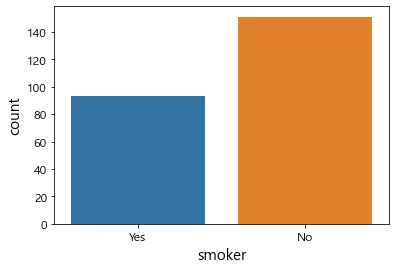

In [51]:
sns.countplot(x='smoker', data=tips) # 범주형 컬럼을 x에 전달 : 범주값 별로 개수를 세서 막대그래프를 그린다.

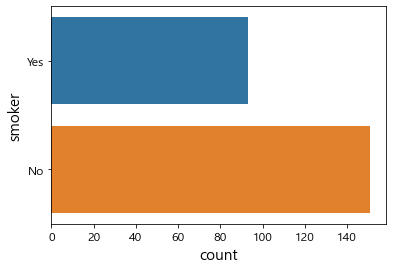

In [52]:
# y = 컬럼명 : 수평막대그래프, x = 컬러명 : 수직막대그래프
sns.countplot(y='smoker', data=tips) 
plt.show()

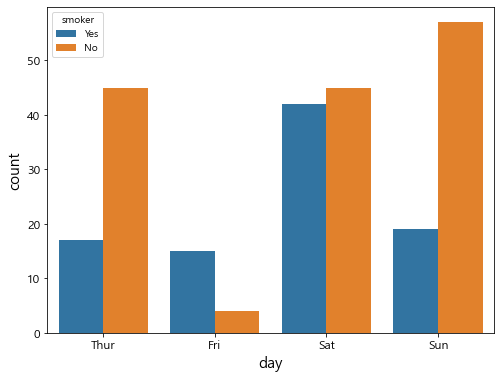

In [85]:
# 요일별 흡연자/비흡연자 별 수

plt.figure(figsize = (8,6))
sns.countplot(x='day', hue = 'smoker', data=tips)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.
- 두 변수 간의 관계성

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

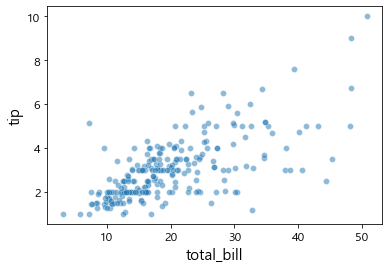

In [89]:
# total_bill과 tip 관계

sns.scatterplot(x='total_bill', y='tip', data =tips, alpha = 0.5)
plt.show()


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

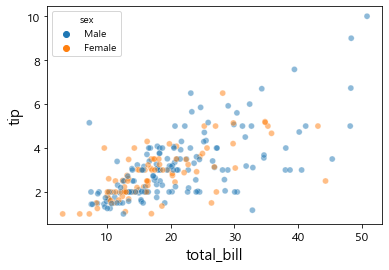

In [59]:
# total_bill 과 tip 관계를 성별 로 나눠서
sns.scatterplot(x='total_bill', y = 'tip', hue = 'sex', data = tips, alpha = 0.5)

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
     - 선형회귀 적합선 : 상관관계를 가장 잘 표현할 수 있는 선을 같이 그려준다.
- scatterplot보다 많이 쓰임.

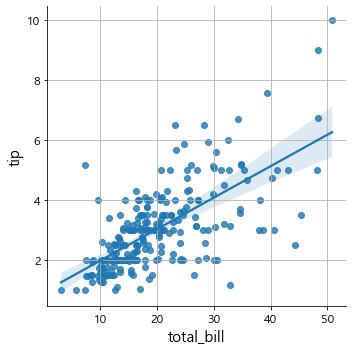

In [62]:
# 증감치를 잘 표현하는 선.

sns.lmplot(x='total_bill', y='tip', data=tips)
plt.grid(True)
plt.show()

# 추론의 모델로 쓰인다.
# 30달러 냈을 때 tip 4 달러 정도 줄 것 같다라는 예측.

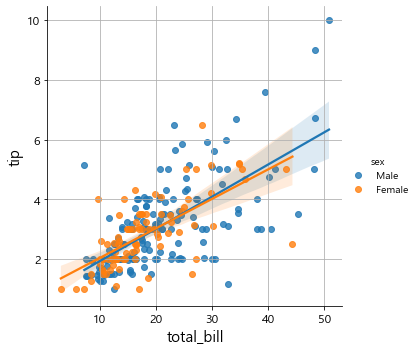

In [64]:
# 성별에 따른 
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.grid(True)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
    - 컬럼명과 dataframe을 따로 설정

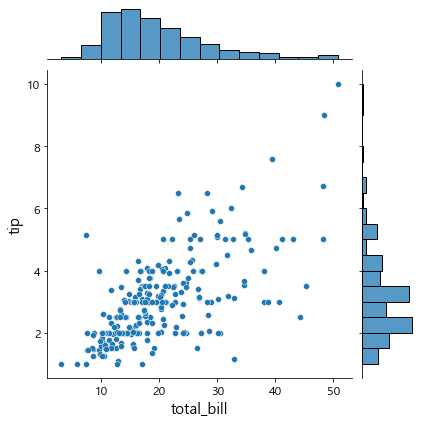

In [65]:
sns.jointplot(x='total_bill', y ='tip', data=tips)
plt.show()

# total_bill이 x축으로
# tip이 y축으로

# total_bill과 tip이 삼전도로

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

<Figure size 1080x1080 with 0 Axes>

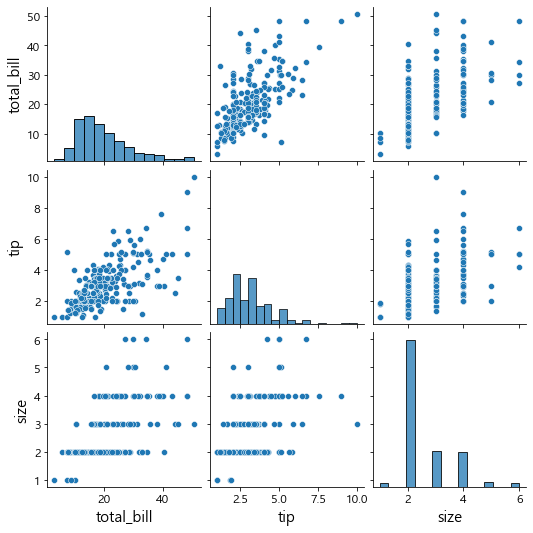

In [67]:
plt.figure(figsize=(15,15))
sns.pairplot(tips) # 매개변수 : dataframe
plt.show()

# dataframe의 수치형 컬럼들만 이용해서 그린다.

# x, y축 똑같은 애들은 히스토그램
# x, y축 다른 애들은 삼전도

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화
- 상관계수를 시각화할 때 주로 쓰임.

In [77]:
# 'total_bill', 'tip', 'size' 컬럼 간의 상관계수
corr_df = tips[['total_bill', 'tip', 'size']].corr()
corr_df
# 상관계수 값에 따라 색을 다르게 하여 시각화

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


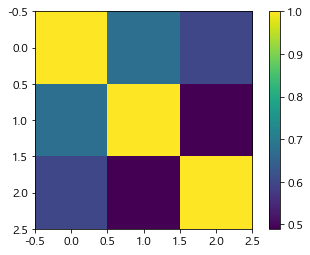

In [76]:
# matplotlib - imshow() : image 를 그려줌. - > pixcel 값(정수)을 redering(이미지화)
# 이것은 heatmap 용도로 만들어준 메소드는 아니고 사진을 화면에 뿌리는 용도로 만들어짐.
# heatmap과 관련된 기능은 몇 없다.

plt.imshow(corr_df)
plt.colorbar() # 값의 색에 대해. 노랑색일 수록 큰, 파랑색일수록 작고, 청록생이 중간이고
plt.show()


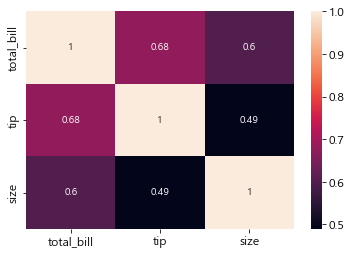

In [79]:
# seaborn : heatmap()
sns.heatmap(corr_df, annot = True) # annot 값 보여줌.
plt.show()

- cmap : colormap / palette - 미리 사용할 색들을 모아놓은 것.
     - color bar 값 별 색을 정해 미리 모아둔다. 
     - 일반적으로 그래프 그릴 때 파랑 - 주황 .. 이렇게 간다. 이것도 색을 미리 모아둔 것.
     - 우리가 만들 수 도 있고, 미리 만들어진 것을 사용할 수도 있다. 

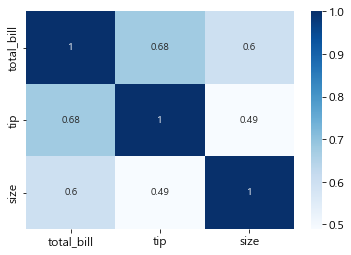

In [80]:
# seaborn : heatmap() 색 범위 바꾸기
sns.heatmap(corr_df, annot = True, cmap = 'Blues') # annot 값 보여줌.
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [93]:
web_df = pd.read_excel('data/webbrowser_share.xls', converters = {'date':np.str})
web_df.set_index('date', inplace = True)
web_df

,Chrome,IE,Edge,Safari,Whale Browser,Firefox,Opera,Swing,Phantom,UC Browser,...,QQ Browser,Vivaldi,360 Safe Browser,Maxthon,Coc Coc,Puffin,Yandex Browser,Sogou Explorer,Mozilla,Whale
date,,,,,,,,,,,,,,,,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26,0.88,0.39,0.25,0.03,...,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.00
2018.09,61.95,27.84,3.16,2.19,1.27,2.57,0.40,0.37,0.00,0.03,...,0.03,0.02,0.06,0.02,0.00,0.00,0.02,0.03,0.00,0.00
2018.10,62.05,28.36,3.35,2.43,1.28,1.36,0.59,0.35,0.00,0.03,...,0.02,0.02,0.02,0.02,0.01,0.00,0.01,0.03,0.01,0.00
2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.55,0.26,0.00,0.02,...,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.02,0.01,0.00
2018.12,68.34,22.31,2.99,2.02,1.11,2.04,0.63,0.25,0.00,0.03,...,0.04,0.01,0.02,0.02,0.03,0.01,0.04,0.02,0.00,0.00
2019.01,70.46,21.05,2.99,2.07,1.14,1.15,0.67,0.24,0.00,0.02,...,0.02,0.02,0.04,0.03,0.01,0.00,0.03,0.01,0.00,0.00
2019.02,70.63,20.71,2.68,2.53,1.22,1.21,0.62,0.22,0.00,0.02,...,0.02,0.02,0.02,0.02,0.00,0.00,0.03,0.01,0.00,0.01
2019.03,63.35,25.42,3.81,3.16,1.65,1.49,0.63,0.25,0.00,0.02,...,0.05,0.01,0.02,0.03,0.02,0.00,0.01,0.03,0.00,0.02
2019.04,63.63,24.65,4.08,3.11,1.64,1.61,0.55,0.22,0.00,0.02,...,0.05,0.01,0.01,0.03,0.01,0.00,0.01,0.03,0.00,0.32


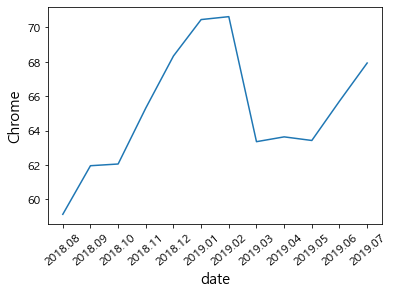

In [98]:
# sns.lineplot(x = 시간역할, y = 변화값 컬럼)
# 시계열 데이터는 보통 일시는 인덱스에 있다. x = 'index' 라 하면 index라는 컬럼을 찾는다.
# x에 dataframe의 index를 사용해야 할 경우 = > 따로 조회해서 넣어준다.

# plt.figure(figsize = (15,6))
sns.lineplot(x = web_df.index, y = 'Chrome', data = web_df)
plt.xticks(rotation = 40) # tick 라벨을 40도 돌려라

plt.show()

In [101]:
df2 = web_df[web_df.columns[:4]] 
df2 # 데이터프레임

,Chrome,IE,Edge,Safari
date,,,,
2018.08,59.12,31.06,2.97,2.52
2018.09,61.95,27.84,3.16,2.19
2018.10,62.05,28.36,3.35,2.43
2018.11,65.31,26.29,3.06,2.09
2018.12,68.34,22.31,2.99,2.02
2019.01,70.46,21.05,2.99,2.07
2019.02,70.63,20.71,2.68,2.53
2019.03,63.35,25.42,3.81,3.16
2019.04,63.63,24.65,4.08,3.11


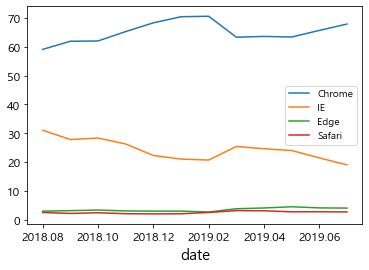

In [102]:
# 같이 그릴 땐 판다스. seaborn으로 안됨. 한다며 따로 해줘야 함.

df2.plot(kind = 'line')
plt.show()

<AxesSubplot:xlabel='date', ylabel='Chrome'>

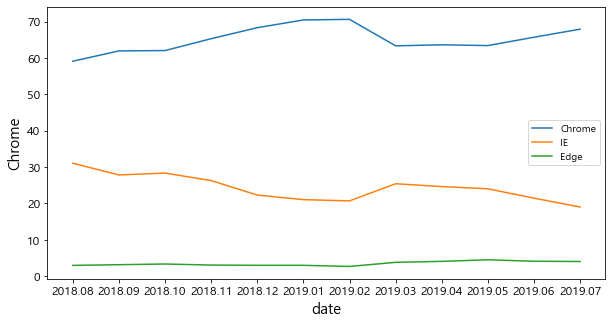

In [104]:
# 할 순 있지만 판다스가 편리하다.
plt.figure(figsize = (10,5))
sns.lineplot(x=df2.index, y = 'Chrome', data = df2, label = 'Chrome')
sns.lineplot(x=df2.index, y = 'IE', data = df2, label = 'IE')
sns.lineplot(x=df2.index, y = 'Edge', data = df2, label = 'Edge')
